In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import pyabeles as pa
%matplotlib inline

In [21]:
data = np.genfromtxt('Miro data.csv',delimiter=',',skip_header=64)
x = data[:,0]
y = data[:,1]
scale = y[0]
for i in range(0,len(y)):
    y[i] /= scale
    x[i] /= 2

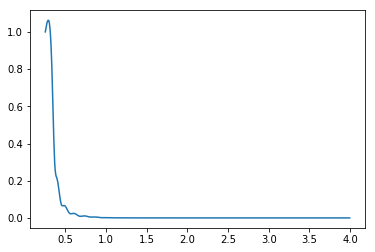

In [3]:
plt.plot(x,y)

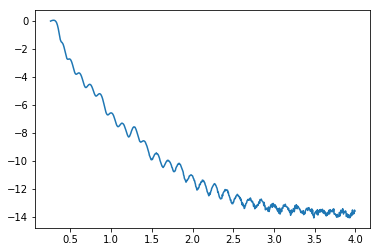

In [4]:
plt.plot(x,np.log(y))

## DE for Fitting

In [5]:
np.random.seed(12345)
struct = pa.Surface()
STO = pa.Layer(0.,5.246,sigma=0.26,name="STO")
LSMO = pa.Layer(250.,6.6, sigma=5.85, name="LSMO")
for i in range(0,1):
    struct.addLayer(LSMO)
struct.addLayer(STO)
exp = struct.doExperiment(x)
R = exp.genTheory(modify=False)
exp.theory = y
f = pa.Fitter(exp,method="de",cutoff_begin=0,cutoff_end=700)
f.bounds = [(0.75, 1.25),
 (0.0, 1.9999999999999999e-06),
 (-0.20000000000000001, 0.20000000000000001),
 (0.1, 10.0),
 (200.0, 400.0),
 (0.0, 0.0),
 (4.9499999999999993, 8.25),
 (3.9345000000000003, 6.557500000000001),
 (4.3874999999999993, 7.3125),
 (0.19500000000000001, 0.32500000000000001)]

### Easy code to modify when which vars are fixed

In [17]:
f.fixed = np.full(10,True)
for i in range(1,10):
    f.set_free(i)
surf = f.fit()

4215.6253695590349

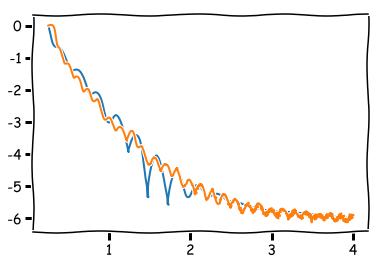

In [18]:
plt.xkcd()
mhm = exp.genTheory(modify=False)
plt.plot(x[0:],np.log10(mhm[0:]))
plt.plot(x[0:],np.log10(y[0:]))
f.error(exp.get_params_list())

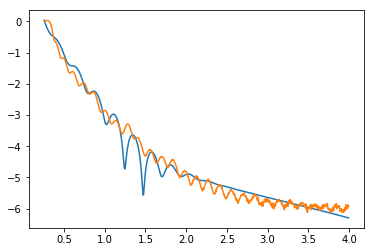

In [16]:
plt.plot(x[0:],np.log10(mhm[0:]))
plt.plot(x[0:],np.log10(y[0:]))

In [8]:
de_params = np.copy(exp.get_params_list())

In [9]:
exp.get_params_list()

[1.0,
 1.315405986675156e-06,
 -0.037058935887146927,
 4.007656295116151,
 316.55123248785509,
 0.0,
 6.050478372125804,
 6.4916890283358439,
 5.4528338913192522,
 0.25101636284487994]

## Nelder-Mead for fitting

In [10]:
np.random.seed(12345)
struct = pa.Surface()
STO = pa.Layer(0.,5.246,sigma=0.26,name="STO")
LSMO = pa.Layer(200.,6.6, sigma=5.85, name="LSMO")
for i in range(0,1):
    struct.addLayer(LSMO)
struct.addLayer(STO)
exp = struct.doExperiment(x)
R = exp.genTheory(modify=False)
exp.theory = y
f = pa.Fitter(exp,method="nm",cutoff_begin=20,cutoff_end=700)

In [11]:
f.fixed = np.full(10,True)
for i in range(1,9):
    f.set_free(i)

f.fixed

array([ True, False, False, False, False, False, False, False, False,  True], dtype=bool)

5388.7406339384161

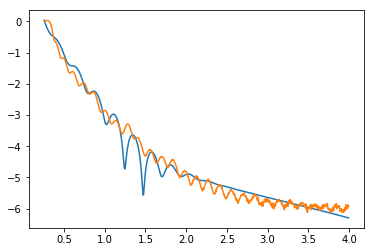

In [12]:
surf = f.fit()
mhm = exp.genTheory(modify=False)
plt.plot(x[0:],np.log10(mhm[0:]))
plt.plot(x[0:],np.log10(y[0:]))
f.error(exp.get_params_list())

In [13]:
exp.get_params_list()

[1.0,
 -3.6867961695253214e-07,
 0.13069787838400046,
 10.259872393946502,
 191.8202297153648,
 0.0063894647211223989,
 -7.9300325054884464,
 -7.2626974635827972,
 10.358198936181363,
 0.26000000000000001]

In [14]:
print de_params
print nm_params

[  1.00000000e+00   1.31540599e-06  -3.70589359e-02   4.00765630e+00
   3.16551232e+02   0.00000000e+00   6.05047837e+00   6.49168903e+00
   5.45283389e+00   2.51016363e-01]


NameError: name 'nm_params' is not defined

In [ ]:
[(0.75, 1.25),
 (0.0, 1.9999999999999999e-06),
 (-0.20000000000000001, 0.20000000000000001),
 (0.1, 10.0),
 (210.0, 350.0),
 (0.0, 0.0),
 (4.9499999999999993, 8.25),
 (3.9345000000000003, 6.557500000000001),
 (4.3874999999999993, 7.3125),
 (0.19500000000000001, 0.32500000000000001)]